# Erdos Renyi Graph

In [1]:
import networkx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats 
import random
import time
import scipy.stats as stats

In [7]:
def erdos_renyi(n,average_degree):
    k = int((average_degree*n)/2) # generation of k values
    nodes =  np.arange(1,n,dtype=np.int64) # rearrange of the code
    g = networkx.empty_graph(n) # making empty graph of n nodes
    
    # the limit of the code to the k value
    for i in range(0, k):
        (node_i, node_j) = np.random.choice(nodes, 2, replace=False) # choose 2 random nodes
        # The idea is to check if there already exist edge between the nodes
        while(g.has_edge(node_i,node_j)):
            (node_i, node_j) = np.random.choice(nodes, 2, replace=False)
        # once the node is found without the edge, we make the edge between them
        g.add_edge(node_i,node_j)

    return g

# Distribution fit

Mean is:  5.0
Standar deviation is:  2.2325542389476194


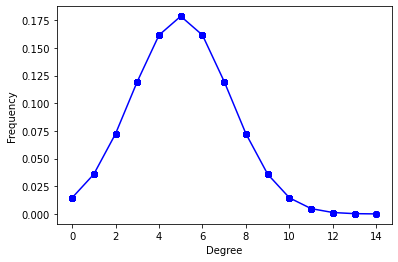

In [15]:
g = erdos_renyi(10000,5) # making 10000 records with degree 5
pd_deg = pd.DataFrame(g.degree(), columns=['Node', 'Degree'])
degreeSort = sorted(pd_deg['Degree'],reverse=True)
print("Mean is: ",pd_deg['Degree'].mean())
print("Standar deviation is: ",pd_deg['Degree'].std())
normalFit = stats.norm.pdf(degreeSort, pd_deg['Degree'].mean(), pd_deg['Degree'].std())
plt.plot(degreeSort,normalFit,'-o',color='b')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()